In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [35]:
data=pd.read_csv('/content/Elon_musk.csv',encoding='latin1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [37]:
data.describe()

,Unnamed: 0
count,1999.000000
mean,1000.000000
std,577.205914
min,1.000000
25%,500.500000
50%,1000.000000
75%,1499.500000
max,1999.000000


In [38]:
data = [x.strip() for x in data.Text] # remove both the leading and the trailing characters
data = [x for x in data if x] # removes empty strings, because they are considered in Python as False
data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [39]:
# Joining the list into one string/text
text = ' '.join(data)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [40]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
from wordcloud import WordCloud

In [68]:
import string # special operations on strings
# import spacy # language models
import nltk
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [43]:
# Punctuation

no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [44]:
# IF work_tokenize does not work install this

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [45]:
# Tokenization

from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo']


In [46]:
#Remove stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
# stop words

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail']


In [48]:
#Noramalize the data

lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last']


In [49]:
# Stemming of words

from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['kunalb11', 'i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail']


In [50]:
!pip install -U pip setuptools wheel
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
!pip install -U pip setuptools wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
!python -m spacy download en_core_web_sm

# also we can import en, venv, .env

2023-05-10 12:57:06.254193: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 71.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [54]:
import spacy

https://spacy.io/usage # Use this link for spacy installation problem solve

In [55]:
# NLP english language model of spacy library

nlp = spacy.load('en_core_web_sm')
nlp

In [56]:
# lemmas being one of them, but mostly POS, which will follow later

doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail


In [57]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'I\x92m', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last']


##### Feature Extraction

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [59]:
print(vectorizer.vocabulary_)

{'kunalb11': 2703, 'alien': 231, 'idaacarmack': 2440, 'ray': 3622, 'trace': 4499, 'cyberpunk': 962, 'hdr': 1677, 'nextlevel': 3158, 'have': 1671, 'try': 4533, 'joerogan': 2623, 'spotify': 4117, 'great': 1609, 'interview': 2551, 'gtera27': 1628, 'doge': 1115, 'underestimate': 4666, 'teslacn': 4344, 'congratulations': 856, 'tesla': 4338, 'china': 740, 'amazing': 257, 'execution': 1326, 'last': 2722, 'year': 4939, 'now': 3198, 'next': 3157, 'even': 1298, 'happy': 1658, 'new': 3154, 'ox': 3315, 'httpstco9wfkmyu2oj': 1867, 'frodo': 1494, 'underdoge': 4665, 'all': 234, 'thought': 4423, 'would': 4914, 'fail': 1362, 'himself': 1723, 'httpstcozgxjfdzzrm': 2400, 'owensparks': 3312, 'flcnhvy': 1436, 'anonyx10': 286, 'haha': 1643, 'thanks': 4382, 'indeed': 2489, 'tweets': 4556, 'definitely': 1017, 'represent': 3705, 'realworld': 3647, 'time': 4442, 'allocation': 236, 'the': 4389, 'entertaining': 1254, 'outcome': 3292, 'likely': 2784, 'givedirectly': 1579, 'just': 2650, 'send': 3890, 'agree': 200, 

In [60]:
print(X.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [61]:
print(X.toarray().shape)

(15795, 4972)


### Let's see how can bigrams and trigrams can be included here (N-grams)

In [64]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(data)

In [65]:

print(bow_matrix_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TFidf vectorizer

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(data)
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.89309813 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


#### Generating wordcloud

In [71]:
# Import packages

from wordcloud import WordCloud, STOPWORDS

# Define a function to plot word cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))    # Set figure size
    plt.imshow(wordcloud)     # Display image
    plt.axis("off");      # No axis details

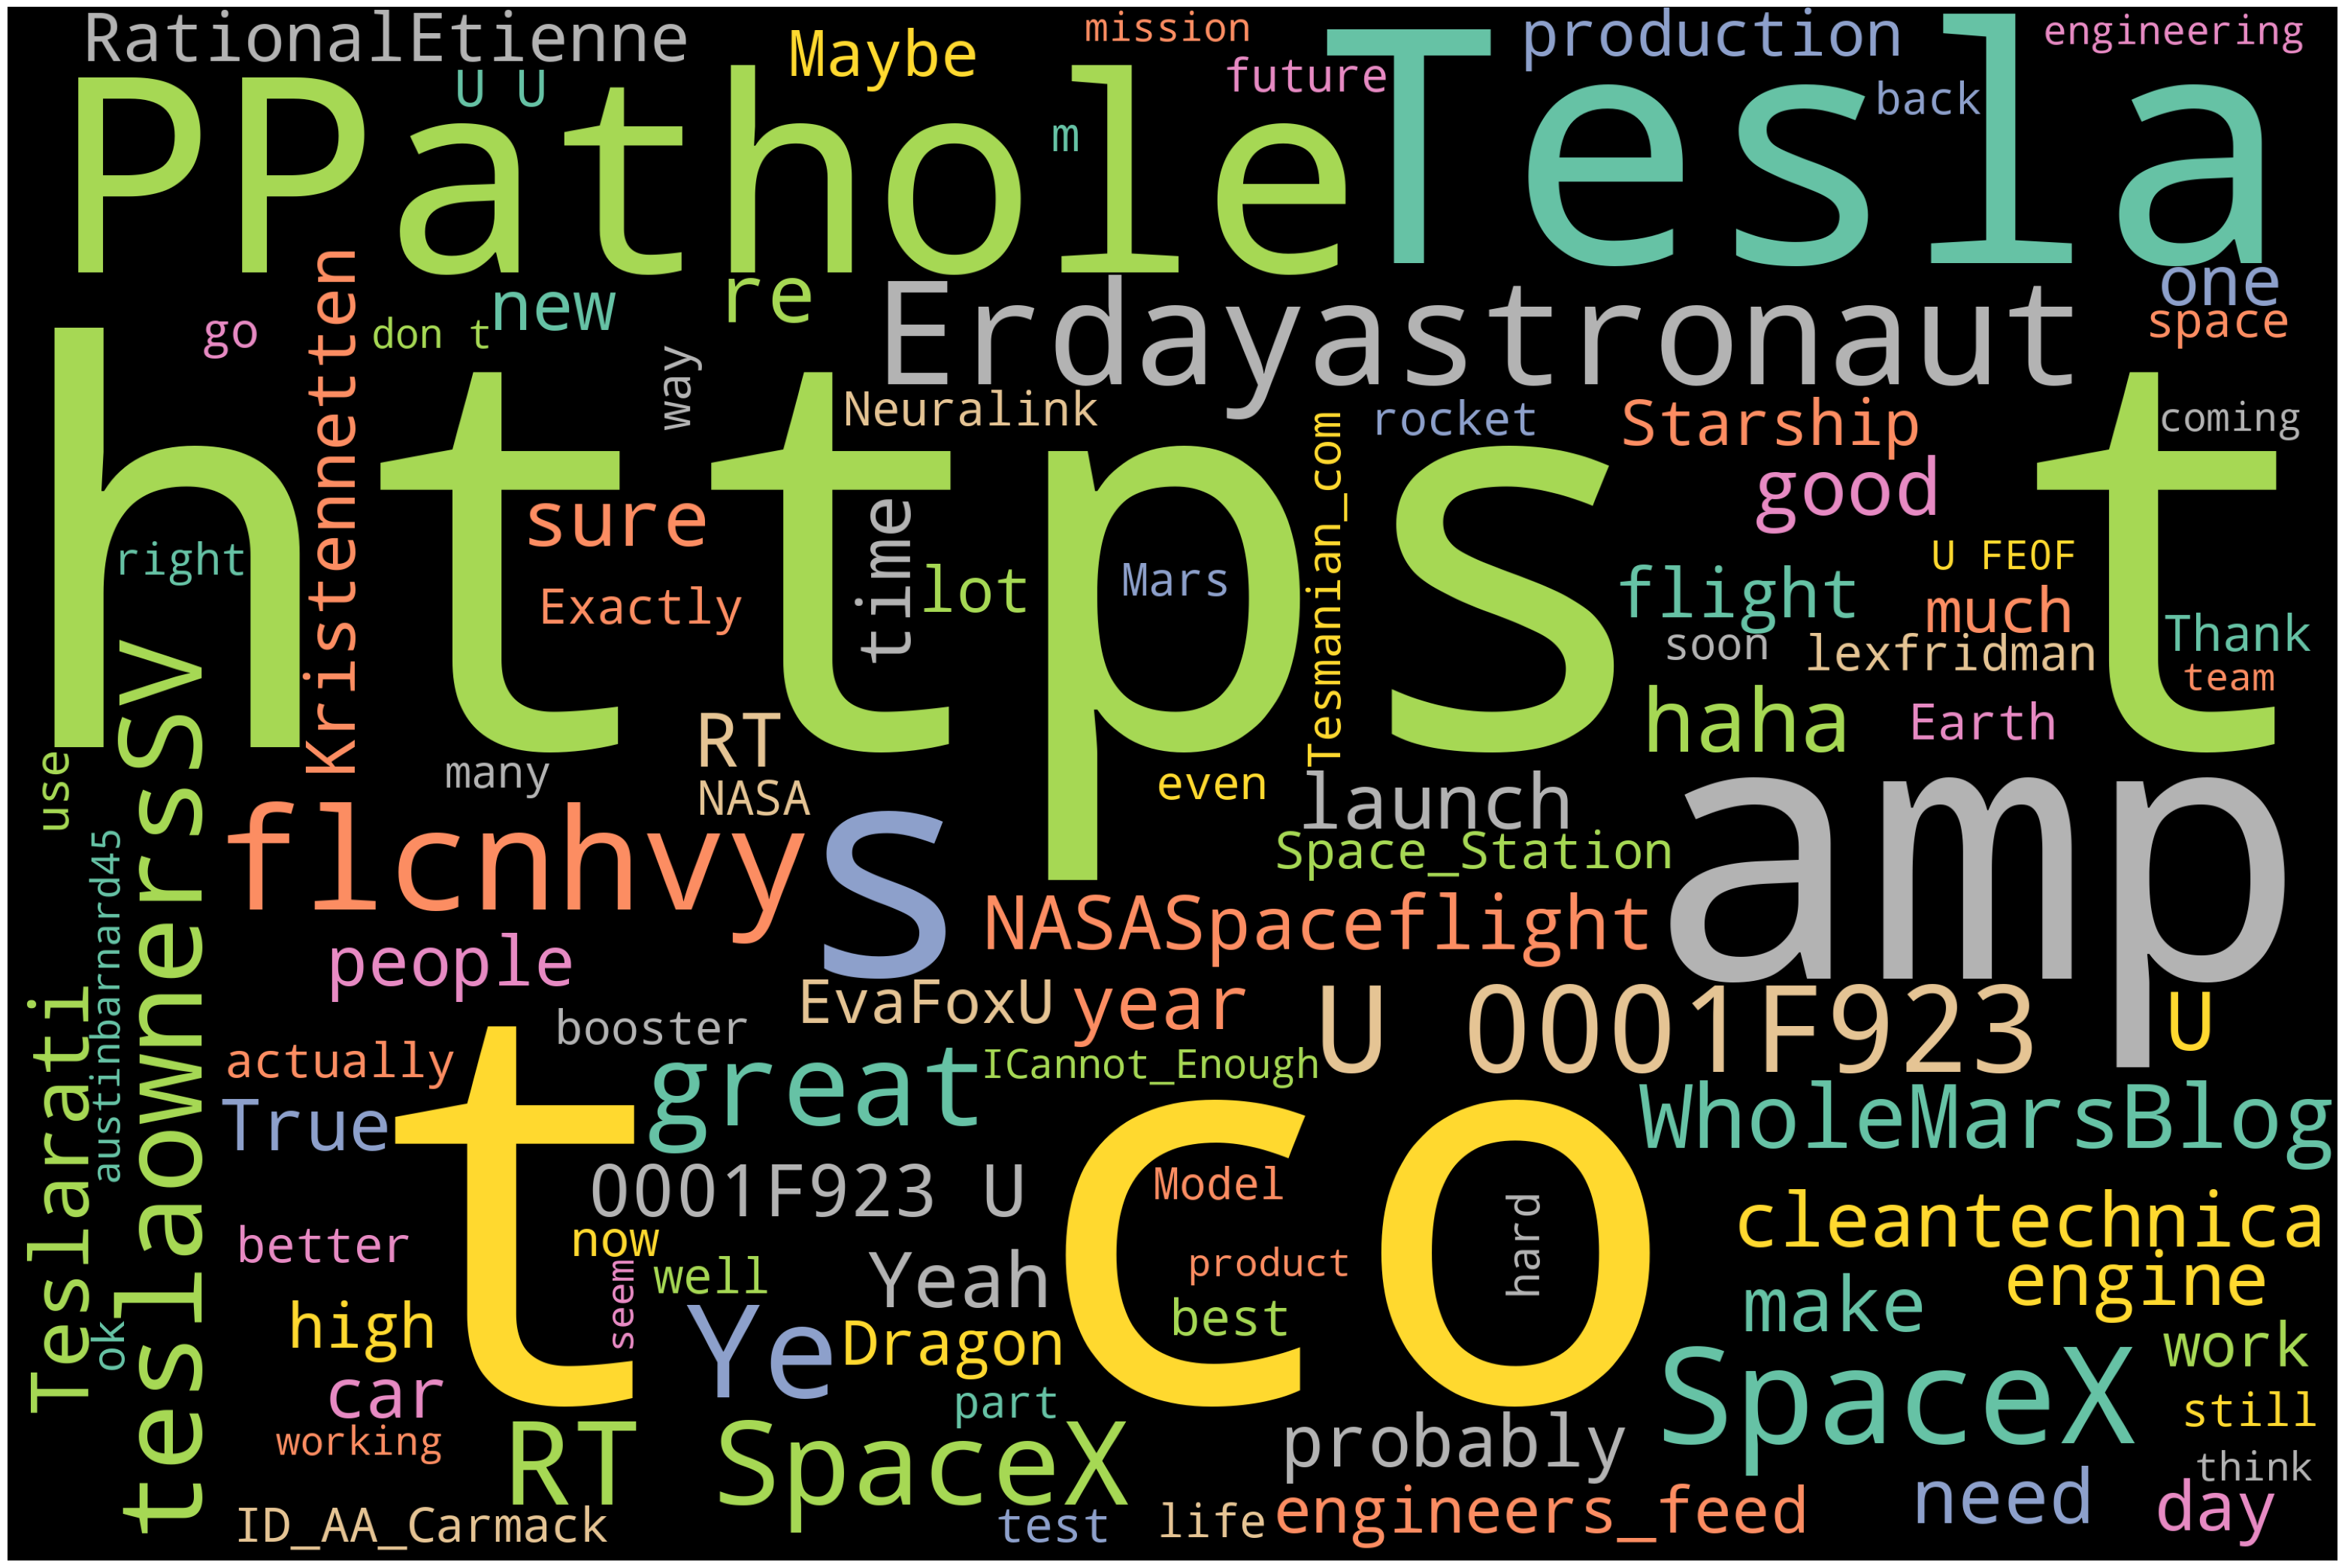

In [72]:
# Generate wordcloud

stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, 
                      height = 2000, 
                      background_color='black', 
                      max_words=100,
                      colormap='Set2',
                      stopwords=stopwords).generate(text)


plot_cloud(wordcloud)  # Plot

import warnings
warnings.filterwarnings('ignore')

## Named Entity Recognition

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = data[150]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [76]:
one_block

'@NASASpaceflight Unlike its aircraft division, which is fine, the FAA space division has a fundamentally broken reg\x85 https://t.co/sI63AXBJbz'

In [77]:
# Give token to all words

for token in doc_block[0:20]:
    print(token, token.pos_)

@NASASpaceflight VERB
Unlike ADP
its PRON
aircraft NOUN
division NOUN
, PUNCT
which PRON
is AUX
fine ADJ
, PUNCT
the DET
FAA PROPN
space NOUN
division NOUN
has VERB
a DET
fundamentally ADV
broken VERB
reg PROPN
  SPACE


In [78]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['has', 'broken', 'https://t.co/sI63AXBJbz']


In [79]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
words_sum= X.sum(axis=0)
words_freq = [(word, words_sum[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,division,2
1,nasaspaceflight,1
2,aircraft,1
3,space,1
4,has,1
5,broken,1
6,https,1
7,co,1
8,si63axbjbz,1


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

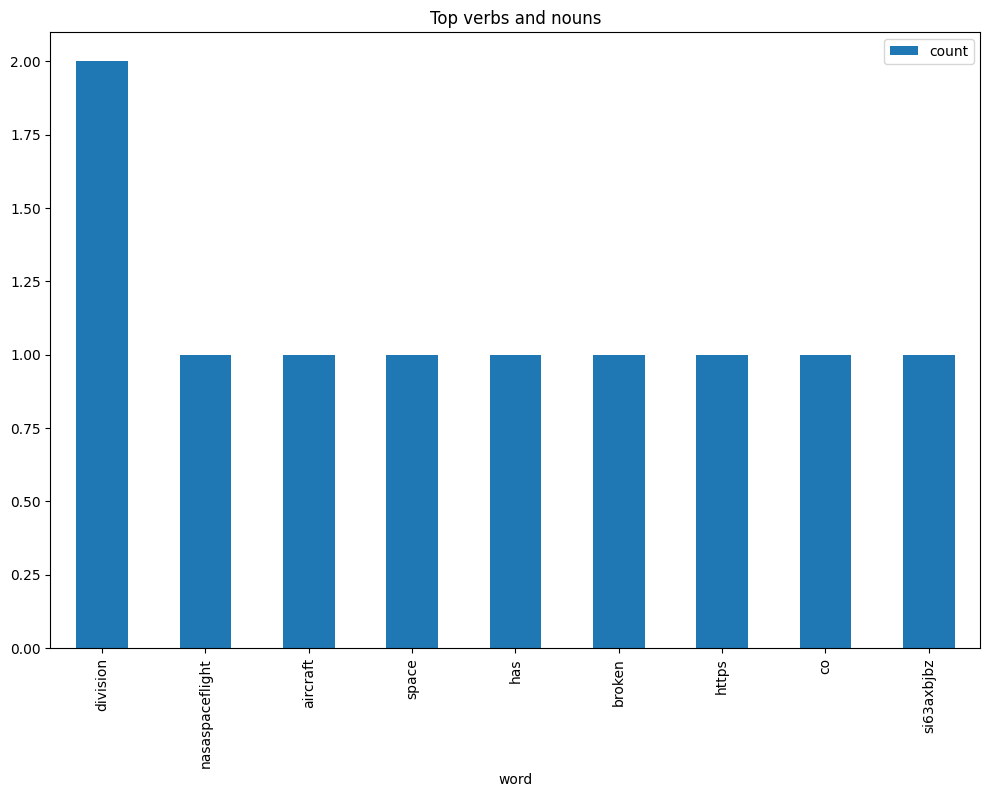

In [80]:
##Visualizion of results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', 
                     figsize=(12,8), 
                     title='Top verbs and nouns')

## Sentimental Analysis (Emotion Mining)

In [81]:
senti_df = pd.DataFrame(data, columns=['Text'])
senti_df

# here I use "senti" for "sentiment or sentimental"

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [84]:
afin = pd.read_csv('/content/afinn.csv',  encoding='latin-1')
afin
#sep=',',

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [85]:
affinity_scores = afin.set_index('word')['value'].to_dict()

In [86]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.

nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

# Create a new function calculate_sentimnet

def calculate_senti(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [87]:
# test that it works

calculate_senti(text = 'amazing')

4

##### Now do Sentimental Calculation with original dataset

In [88]:
senti_df['sentimental_value'] = senti_df['Text'].apply(calculate_senti)

In [89]:
senti_df.head()

,Text,sentimental_value
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated,-1
4,@teslacn Congratulations Tesla China for amazi...,4


In [90]:
# calculate, quantity of words are in the sentence

senti_df['word_count'] = senti_df['Text'].str.split().apply(len)

In [91]:
senti_df.head()

,Text,sentimental_value,word_count
0,@kunalb11 Im an alien,0,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated,-1,4
4,@teslacn Congratulations Tesla China for amazi...,4,17


In [92]:
senti_df['word_count']

0        4
1       13
2        4
3        4
4       17
        ..
1994    23
1995    12
1996     4
1997     7
1998     4
Name: word_count, Length: 1999, dtype: int64

In [93]:
senti_df.sort_values(by='sentimental_value')

,Text,sentimental_value,word_count
186,"@naval [Some tyranny]. Also, the road to hell ...",-7,14
1637,@TimothyBuffett @Teslarati Apart from failing ...,-6,17
1015,@enn_nafnlaus There are sketchy edits to Tesla...,-6,17
1717,@Neuro_Skeptic They dont fire all at once. So...,-6,20
1063,@tesladri @ChananBos @raytech247 @WholeMarsBlo...,-5,21
...,...,...,...
1357,Great trip to Germany. Support from government...,10,12
468,@picot_john @CyberpunkGame Its a good to grea...,10,20
1172,Thanks Tesla Team for great work on deliveries...,10,20
1304,"One way or another, excitement guaranteed! Sup...",11,17


* It gives us rank from most smaller(minimum) to most larger(maximum), it starts from minmum = -6 to maximum = 12

In [94]:
senti_df.sort_values(by='sentimental_value').head(10)

,Text,sentimental_value,word_count
186,"@naval [Some tyranny]. Also, the road to hell ...",-7,14
1637,@TimothyBuffett @Teslarati Apart from failing ...,-6,17
1015,@enn_nafnlaus There are sketchy edits to Tesla...,-6,17
1717,@Neuro_Skeptic They dont fire all at once. So...,-6,20
1063,@tesladri @ChananBos @raytech247 @WholeMarsBlo...,-5,21
1574,@universal_sci Asteroid impact risk is well un...,-5,13
1533,@PPathole The early investor part of Tesla i...,-5,21
1393,@l_vaux @kulpability @tlowdon @EthicalSkeptic ...,-5,16
820,@Chad_Hurley @realDonaldTrump @kanyewest Uh ...,-4,6
1305,SN8 Starship with flaps &amp; nosecone should ...,-4,25


In [95]:
senti_df.sort_values(by='sentimental_value').tail(10)

,Text,sentimental_value,word_count
1608,@Teslarati Aiming to make it super fun!,7,7
1590,@viktaur27 @Teslarati The rate of improvement ...,7,19
1966,@nichegamer I didnt mind DA2. DA1 was awesome...,8,16
1786,@flcnhvy @yourfavgas @ajtourville I really wan...,8,19
458,@teslaownerssv It will get absurdly good. Tesl...,10,18
1357,Great trip to Germany. Support from government...,10,12
468,@picot_john @CyberpunkGame Its a good to grea...,10,20
1172,Thanks Tesla Team for great work on deliveries...,10,20
1304,"One way or another, excitement guaranteed! Sup...",11,17
1388,"@GerberKawasaki Wow, I super loved astronomy (...",12,20


###### Satistrical decscription of Sentiment score of the whole review

In [96]:
senti_df['sentimental_value'].describe()

count    1999.000000
mean        0.669835
std         1.742148
min        -7.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        12.000000
Name: sentimental_value, dtype: float64

###### Sentimental Score Whole Review

In [97]:
senti_df[senti_df['sentimental_value']<=-5]

,Text,sentimental_value,word_count
186,"@naval [Some tyranny]. Also, the road to hell ...",-7,14
1015,@enn_nafnlaus There are sketchy edits to Tesla...,-6,17
1063,@tesladri @ChananBos @raytech247 @WholeMarsBlo...,-5,21
1393,@l_vaux @kulpability @tlowdon @EthicalSkeptic ...,-5,16
1533,@PPathole The early investor part of Tesla i...,-5,21
1574,@universal_sci Asteroid impact risk is well un...,-5,13
1637,@TimothyBuffett @Teslarati Apart from failing ...,-6,17
1717,@Neuro_Skeptic They dont fire all at once. So...,-6,20


* Loweest sentimental score = -7 *
here 

In [98]:
senti_df[senti_df['sentimental_value']>=10]

,Text,sentimental_value,word_count
458,@teslaownerssv It will get absurdly good. Tesl...,10,18
468,@picot_john @CyberpunkGame Its a good to grea...,10,20
1172,Thanks Tesla Team for great work on deliveries...,10,20
1304,"One way or another, excitement guaranteed! Sup...",11,17
1357,Great trip to Germany. Support from government...,10,12
1388,"@GerberKawasaki Wow, I super loved astronomy (...",12,20


* Highest Sentimental score = 12

In [99]:
senti_df['index']=range(0,len(senti_df))

# length Range deceide from 0 to last raw , so for last raw here write "len(senti_df)"

In [100]:
senti_df

,Text,sentimental_value,word_count,index
0,@kunalb11 Im an alien,0,4,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0,13,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge is underestimated,-1,4,3
4,@teslacn Congratulations Tesla China for amazi...,4,17,4
...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",-3,23,1994
1995,@PPathole Make sure to read ur terms &amp; con...,1,12,1995
1996,@TeslaGong @PPathole Samwise Gamgee,0,4,1996
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,0,7,1997


### Ploting  Graphs for Visualization

<Axes: xlabel='index', ylabel='sentimental_value'>

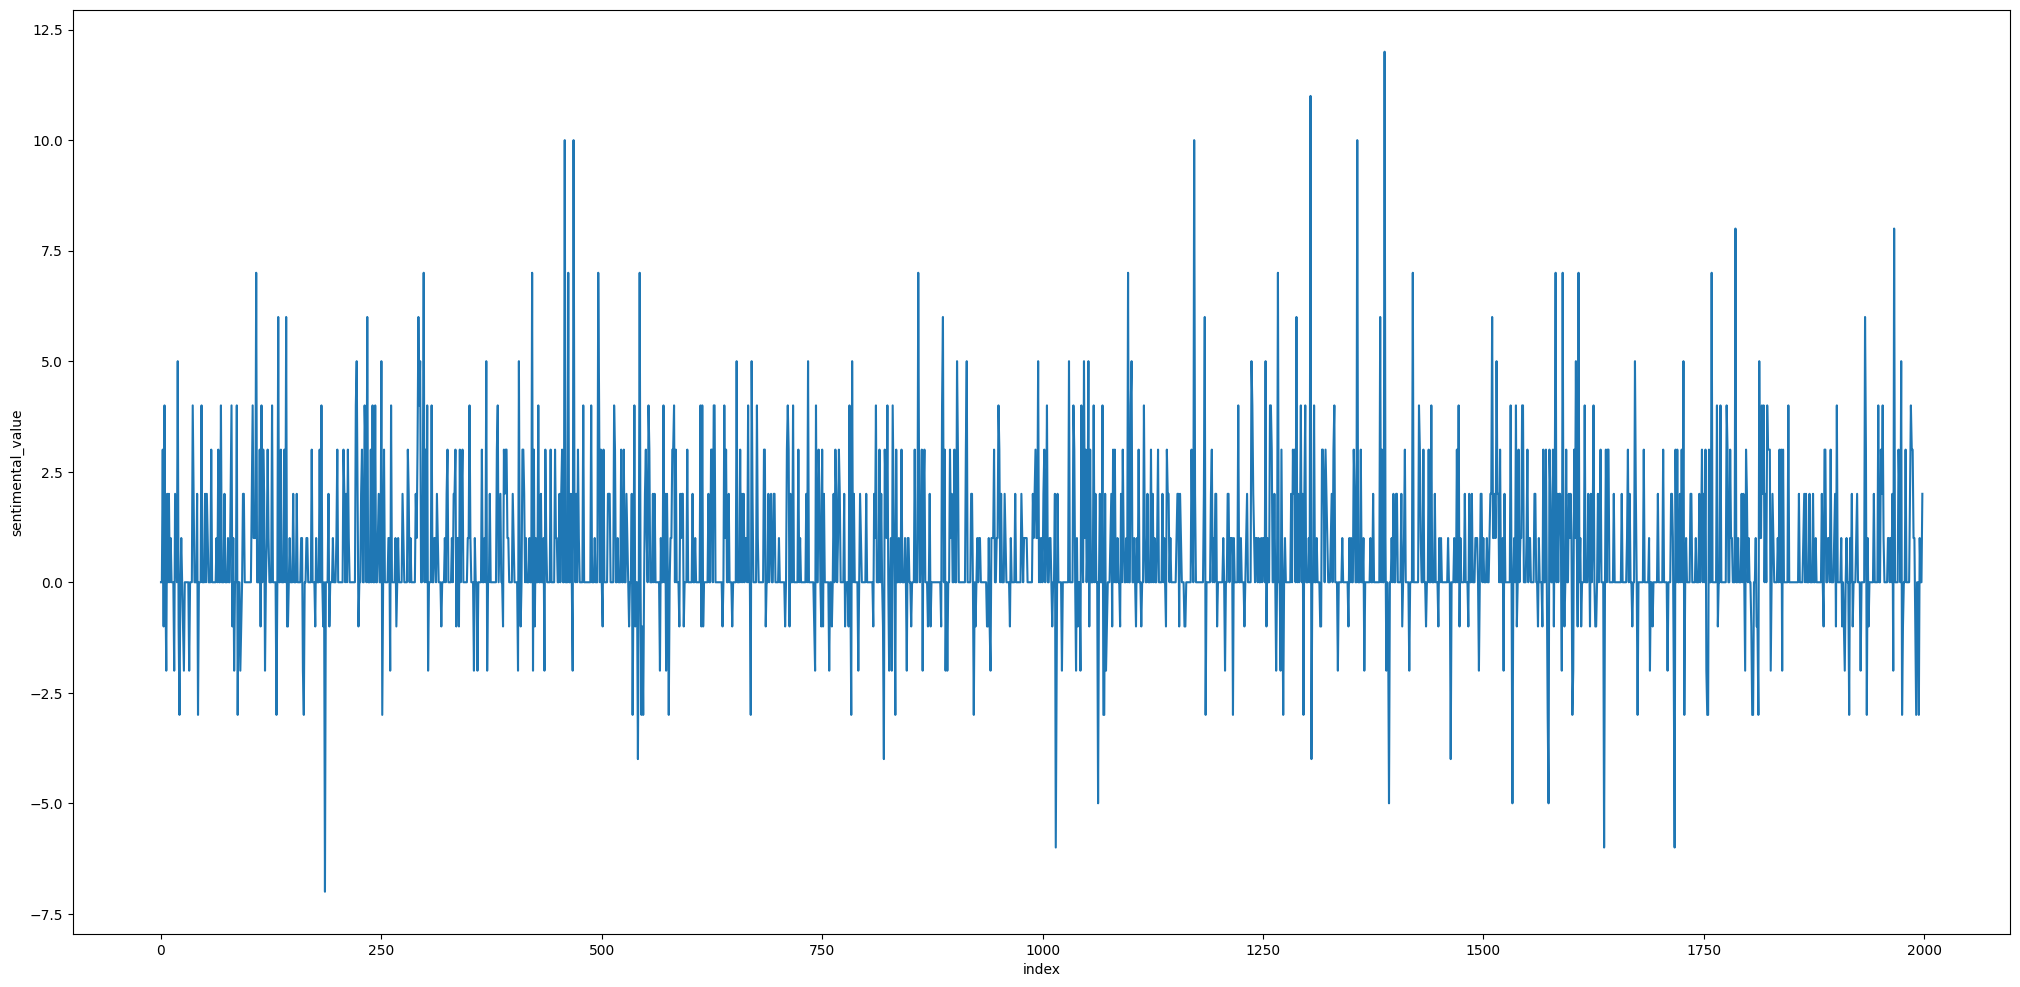

In [101]:
# Lineplot
plt.figure(figsize=(25,12))
sns.lineplot(y='sentimental_value',x='index',data=senti_df)

<Axes: xlabel='sentimental_value', ylabel='Density'>

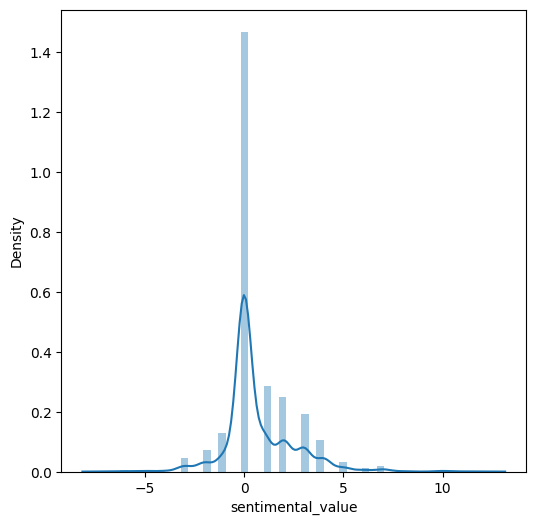

In [102]:
# Distplot

plt.figure(figsize=(6,6))
sns.distplot(senti_df['sentimental_value'])

<Axes: title={'center': "Text's sentimental values to Text's word count"}, xlabel='word_count', ylabel='sentimental_value'>

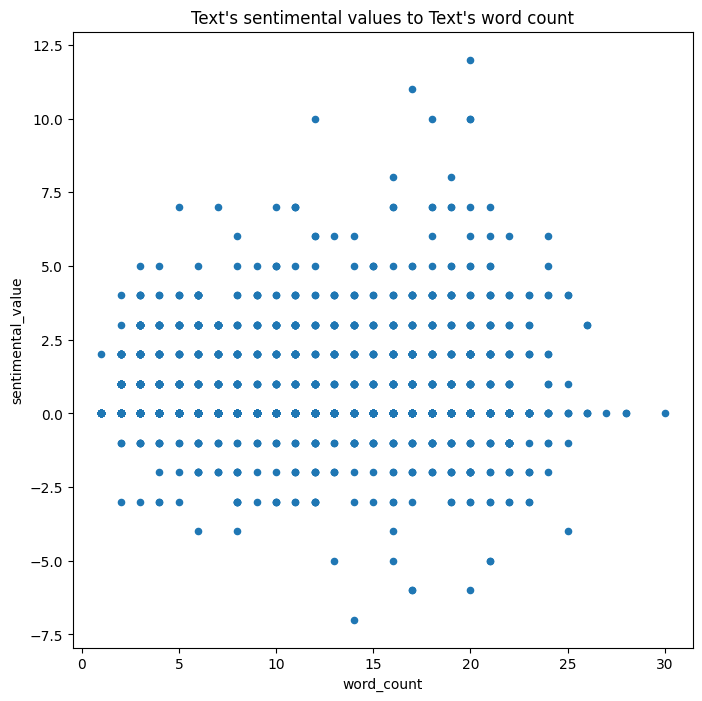

In [103]:
# Scatter plot

senti_df.plot.scatter(x='word_count', 
                      y='sentimental_value', 
                      figsize=(8,8), 
                      title = ("Text's sentimental values to Text's word count"))

* As per graph we can saw this sentimenatal analysis not be Linear 